# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [80]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [81]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [82]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head(20)

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163
2001,Bathurst Manor,2405,1550,0,130,130,375,745,0,304749,843,1052
2001,Bay Street Corridor,10,7575,0,0,15,0,240,0,257404,1218,1142
2001,Bayview Village,2170,630,0,170,765,15,640,0,327644,1197,1164
2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5,343535,1212,1018


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

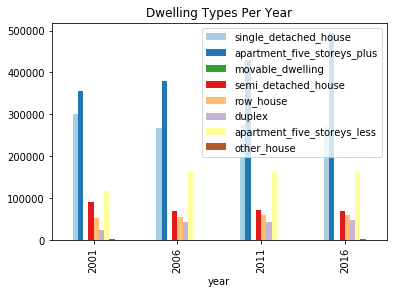

In [83]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types = to_data[["single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]].groupby("year").sum()
dwelling_types.plot(kind="bar", title="Dwelling Types Per Year", colormap="Paired")

In [84]:
# Save the dataframe as a csv file
dwelling_types.to_csv("dwelling_types_per_year.csv")
dwelling_types

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [85]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    
    df= pd.DataFrame(data).plot(kind="bar", title=title, xlabel=xlabel, ylabel=ylabel, color=color)
    """
    Create a barplot based in the data argument.
    """

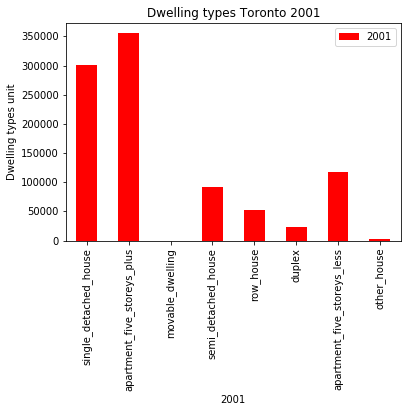

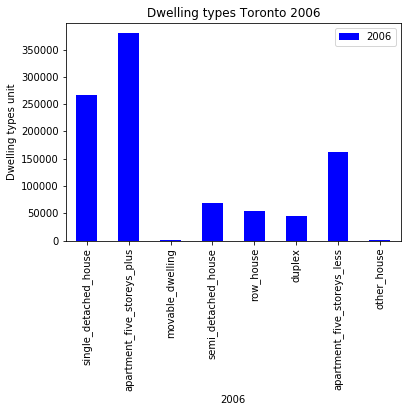

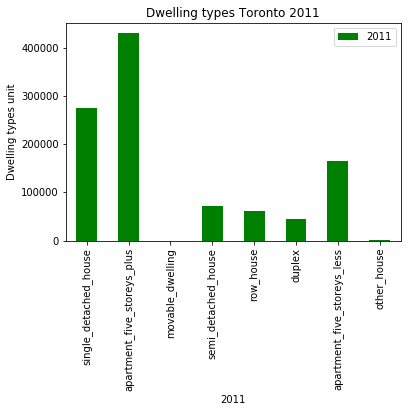

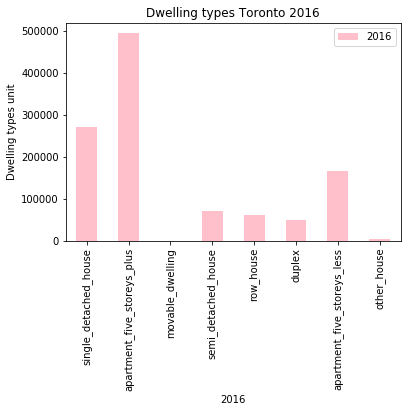

In [86]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(dwelling_types.iloc[0], "Dwelling types Toronto 2001", "2001", "Dwelling types unit", "red")

# Bar chart for 2006
create_bar_chart(dwelling_types.iloc[1], "Dwelling types Toronto 2006", "2006", "Dwelling types unit", "blue")

# Bar chart for 2011
create_bar_chart(dwelling_types.iloc[2], "Dwelling types Toronto 2011", "2011", "Dwelling types unit", "green")

# Bar chart for 2016
create_bar_chart(dwelling_types.iloc[3], "Dwelling types Toronto 2016", "2016", "Dwelling types unit", "pink")

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [87]:
# Calculate the average monthly shelter costs for owned and rented dwellings
average_monthly_shelter = to_data[["shelter_costs_owned", "shelter_costs_rented"]].groupby("year").mean()
average_monthly_shelter

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


In [88]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    df= pd.DataFrame(data).plot(kind="line", title=title, xlabel=xlabel, ylabel=ylabel, color=color)

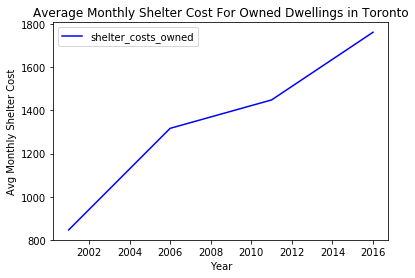

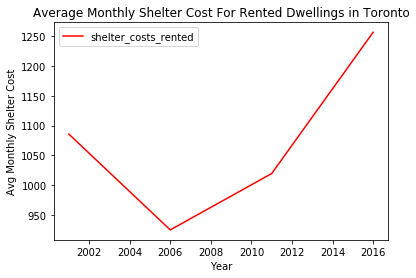

In [89]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(average_monthly_shelter["shelter_costs_owned"], "Average Monthly Shelter Cost For Owned Dwellings in Toronto", "Year", "Avg Monthly Shelter Cost", "blue")

# Line chart for rented dwellings
create_line_chart(average_monthly_shelter["shelter_costs_rented"], "Average Monthly Shelter Cost For Rented Dwellings in Toronto", "Year", "Avg Monthly Shelter Cost", "red")

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [90]:
# Calculate the average house value per year
avg_house_value = to_data["average_house_value"].groupby("year").mean()
avg_house_value

year
2001    289882.885714
2006    424059.664286
2011    530424.721429
2016    664068.328571
Name: average_house_value, dtype: float64

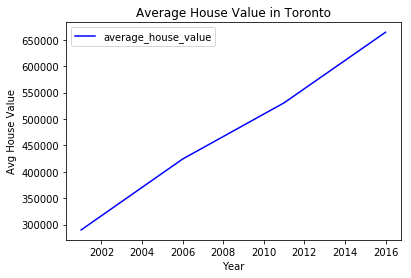

In [91]:
# Plot the average house value per year as a line chart
create_line_chart(avg_house_value, "Average House Value in Toronto", "Year", "Avg House Value", "blue")

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [92]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_value_neighbourhood = to_data.reset_index()
avg_value_neighbourhood = avg_value_neighbourhood[["year", "neighbourhood", "average_house_value"]]
avg_value_neighbourhood.head(10)


,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
5,2001,Bathurst Manor,304749
6,2001,Bay Street Corridor,257404
7,2001,Bayview Village,327644
8,2001,Bayview Woods-Steeles,343535
9,2001,Bedford Park-Nortown,565304


In [93]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood

avg_value_neighbourhood.hvplot.line(x="year", y="average_house_value", groupby="neighbourhood")


:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [94]:
# Fetch the data of all dwelling types per year
num_dwell_types_year = to_data.reset_index()
num_dwell_types_year = num_dwell_types_year[["year","neighbourhood","single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house"]]

num_dwell_types_year.head(10)

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
0,2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
1,2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2,2001,Alderwood,3175,315,0,470,50,185,370,0
3,2001,Annex,1060,6090,5,1980,605,275,3710,165
4,2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
5,2001,Bathurst Manor,2405,1550,0,130,130,375,745,0
6,2001,Bay Street Corridor,10,7575,0,0,15,0,240,0
7,2001,Bayview Village,2170,630,0,170,765,15,640,0
8,2001,Bayview Woods-Steeles,1650,1715,0,925,105,10,170,5
9,2001,Bedford Park-Nortown,4985,2080,0,45,40,210,1235,15


In [95]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood

num_dwell_types_year.hvplot.bar(x="year", groupby="neighbourhood", rot=90, width=600, height=500)


:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [96]:
# Getting the data from the top 10 expensive neighbourhoods
to_data_reset = to_data.reset_index()
most_expensive_neighbourhoods = to_data_reset[["neighbourhood","single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house","average_house_value", "shelter_costs_owned", "shelter_costs_rented"]].groupby("neighbourhood").mean()
most_expensive_neighbourhoods.sort_values("average_house_value", ascending=False, inplace=True)
top_ten_most_expensive = most_expensive_neighbourhoods.iloc[0:10]
filt_top_ten = top_ten_most_expensive["average_house_value"]
filt_top_ten.head(10)

neighbourhood
Bridle Path-Sunnybrook-York Mills    1526485.75
Forest Hill South                    1195992.50
Lawrence Park South                  1094027.75
Rosedale-Moore Park                  1093640.00
St.Andrew-Windfields                  999107.00
Casa Loma                             981064.25
Bedford Park-Nortown                  930415.25
Forest Hill North                     851680.50
Kingsway South                        843234.25
Yonge-St.Clair                        813220.25
Name: average_house_value, dtype: float64

# Plotting the data from the top 10 expensive neighbourhoods
# YOUR CODE HERE!

- - - 

In [97]:
filt_top_ten.hvplot.bar(x="neighbourhood", title="Top 10 Most Expensive Neighbourhoods in Toronto",rot=90, height= 800)

:Bars   [neighbourhood]   (average_house_value)

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [98]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path, index_col="neighbourhood")
df_neighbourhood_locations.head()

,lat,lon
neighbourhood,,
Agincourt North,43.805441,-79.266712
Agincourt South-Malvern West,43.788658,-79.265612
Alderwood,43.604937,-79.541611
Annex,43.671585,-79.404001
Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [99]:
# Calculate the mean values for each neighborhood
df_neighbourhood_mean = to_data_reset[["neighbourhood","single_detached_house", "apartment_five_storeys_plus", "movable_dwelling", "semi_detached_house", "row_house", "duplex", "apartment_five_storeys_less", "other_house","average_house_value", "shelter_costs_owned", "shelter_costs_rented"]].groupby("neighbourhood").mean()

df_neighbourhood_mean.head(10)

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,
Agincourt North,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
Bathurst Manor,2131.25,1815.00,0.00,151.25,70.00,677.50,973.75,8.75,501576.75,1307.00,1059.50
Bay Street Corridor,3.75,10470.00,0.00,1.25,18.75,1.25,271.25,2.50,423653.50,1494.50,1436.75
Bayview Village,2101.25,3222.50,2.50,141.25,830.00,70.00,500.00,2.50,539258.75,1512.75,1422.00
Bayview Woods-Steeles,1585.00,1700.00,0.00,580.00,175.00,86.25,522.50,1.25,565413.50,1364.25,1399.50


In [100]:
# Join the average values with the neighbourhood locations
concat_df = pd.concat([df_neighbourhood_locations, df_neighbourhood_mean], axis="columns", join="outer")
concat_df.head(10)

,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
neighbourhood,,,,,,,,,,,,,
Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.50,1109.00,983.50
Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.00,1131.25,985.00
Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.50,1166.75,1003.25
Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.00,1692.75,1315.25
Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.00,1463.50,1242.75
Bathurst Manor,43.764813,-79.456055,2131.25,1815.00,0.00,151.25,70.00,677.50,973.75,8.75,501576.75,1307.00,1059.50
Bay Street Corridor,43.657511,-79.385721,3.75,10470.00,0.00,1.25,18.75,1.25,271.25,2.50,423653.50,1494.50,1436.75
Bayview Village,43.776361,-79.377117,2101.25,3222.50,2.50,141.25,830.00,70.00,500.00,2.50,539258.75,1512.75,1422.00
Bayview Woods-Steeles,43.796802,-79.382118,1585.00,1700.00,0.00,580.00,175.00,86.25,522.50,1.25,565413.50,1364.25,1399.50


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

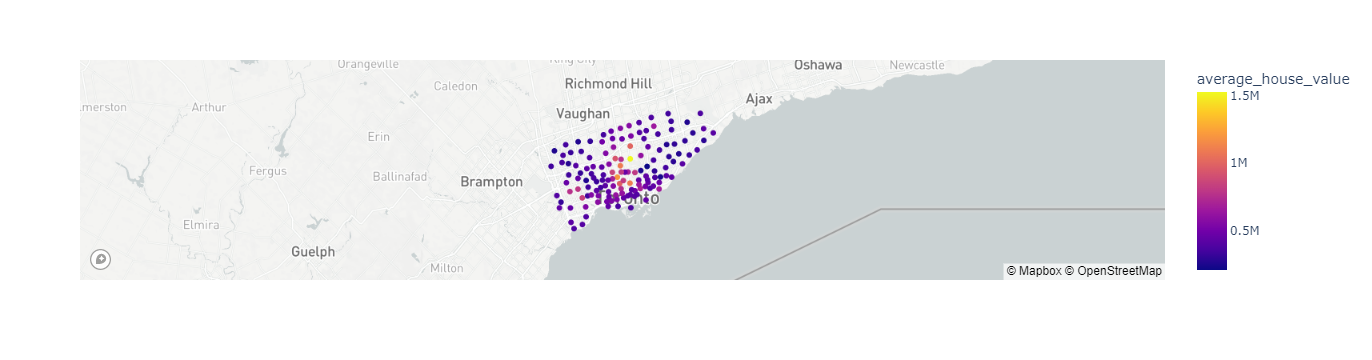

In [101]:
# Create a scatter mapbox to analyze neighbourhood info
map_plot= px.scatter_mapbox(
    concat_df,
    lat="lat",
    lon="lon",
    color="average_house_value"
   
)
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

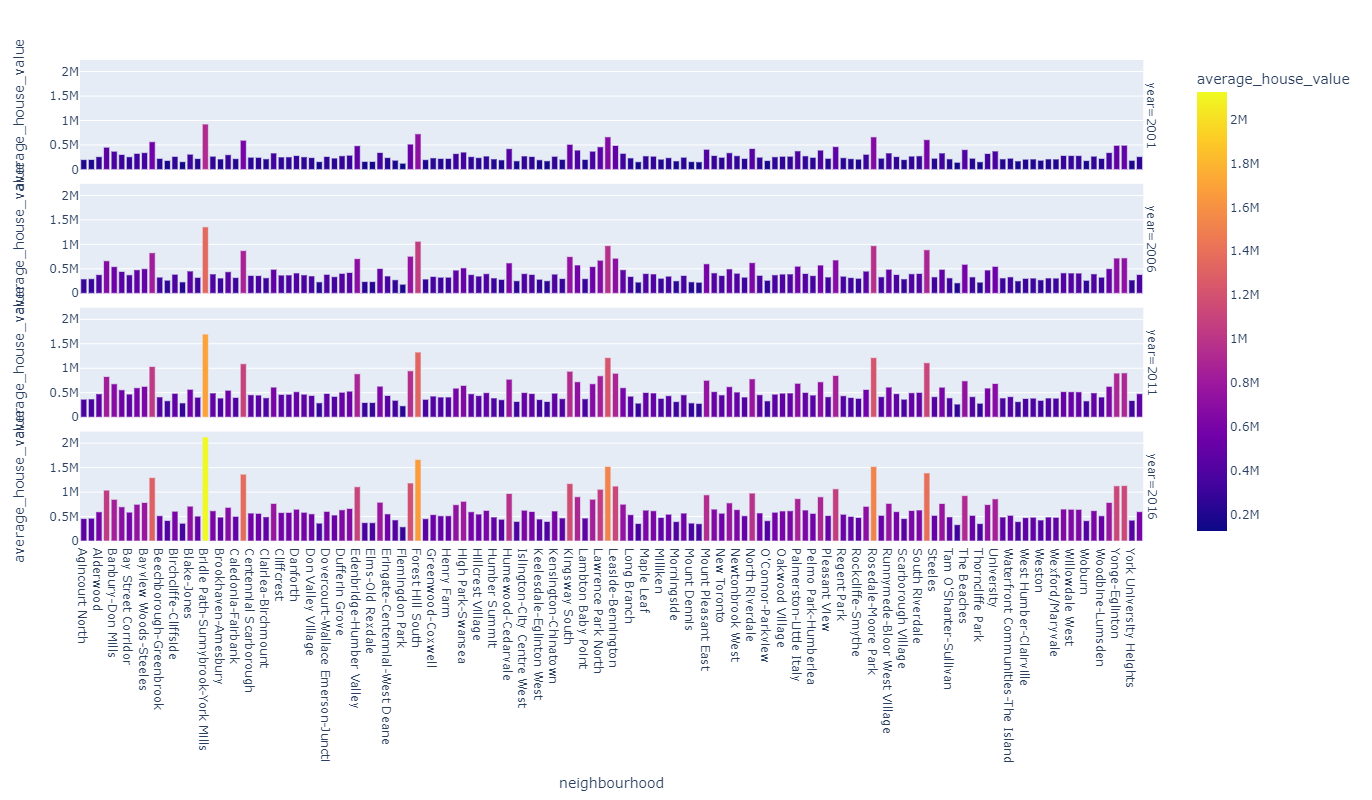

In [106]:


to_data_reset.head(100)

fig1 = px.bar(to_data_reset, x="neighbourhood", y="average_house_value", color="average_house_value", facet_row="year", height=800)
fig1.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [124]:
# Fetch the data from all expensive neighbourhoods per year.

sum_columns = to_data_reset["shelter_costs_owned"] + to_data_reset["shelter_costs_rented"]
to_data_reset["shelter costs owned + rented"] = sum_columns

most_exp_2001 = to_data_reset.loc[to_data_reset["year"] == 2001].sort_values("shelter costs owned + rented", ascending=False).iloc[0:10]
most_exp_2006 = to_data_reset.loc[to_data_reset["year"] == 2006].sort_values("shelter costs owned + rented", ascending=False).iloc[0:10]
most_exp_2011 = to_data_reset.loc[to_data_reset["year"] == 2011].sort_values("shelter costs owned + rented", ascending=False).iloc[0:10]
most_exp_2016 = to_data_reset.loc[to_data_reset["year"] == 2016].sort_values("shelter costs owned + rented", ascending=False).iloc[0:10]

most_exp_df = pd.concat([most_exp_2001, most_exp_2006, most_exp_2011, most_exp_2016], axis="rows", join="inner")


most_exp_df.head(50)


,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented,shelter costs owned + rented
16,2001,Bridle Path-Sunnybrook-York Mills,2275,110,0,25,15,10,20,0,927466,1983,1790,3773
104,2001,Rosedale-Moore Park,2610,3880,0,520,225,290,1735,0,664476,1219,1540,2759
21,2001,Casa Loma,1035,1700,0,415,190,185,1090,5,596077,1241,1500,2741
64,2001,Kingsway South,2370,260,0,65,45,0,340,10,512334,1362,1340,2702
69,2001,Lawrence Park South,3590,570,0,170,70,190,845,40,664712,1021,1630,2651
111,2001,St.Andrew-Windfields,3275,1455,0,220,555,45,525,5,607040,1055,1551,2606
136,2001,Yonge-Eglinton,1650,1525,0,480,25,350,1175,10,491987,1035,1479,2514
68,2001,Lawrence Park North,3410,170,0,830,25,155,965,0,461393,1071,1441,2512
122,2001,Waterfront Communities-The Island,285,9205,5,160,430,20,375,40,228975,1177,1306,2483
44,2001,Forest Hill South,1815,2440,5,65,45,85,1010,15,726664,1001,1469,2470


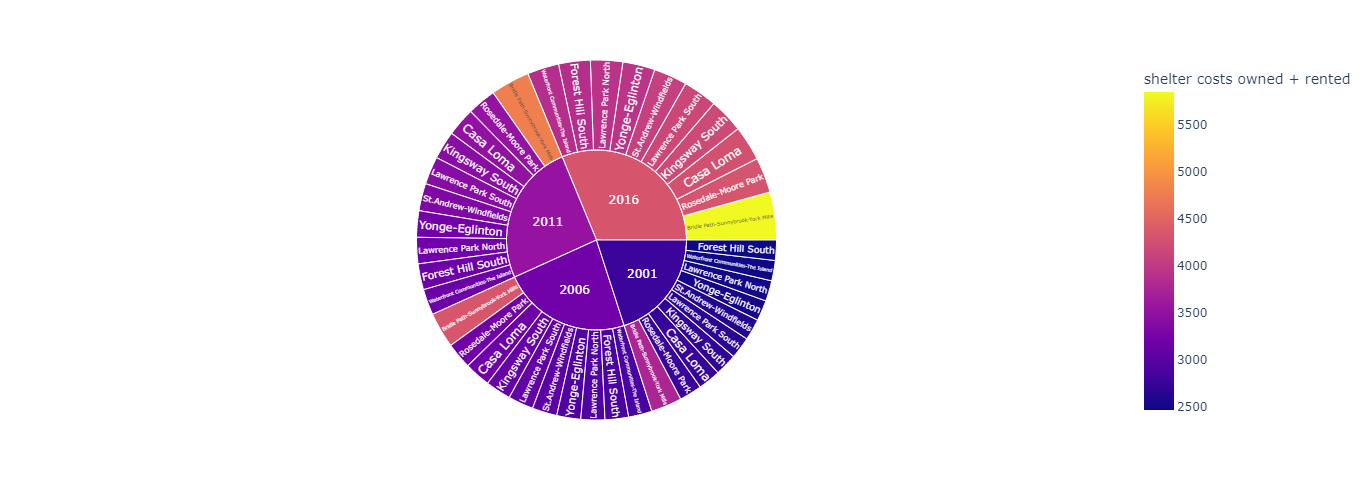

In [125]:
# Create the sunburst chart
fig2 = px.sunburst(most_exp_df, values="shelter costs owned + rented", color="shelter costs owned + rented", path=["year", "neighbourhood" ], height=500)
fig2.show()